# News Sentiment Analysis

## Observation 1: CBS has a much higher compound than the other stations.
## Observation 2: Most of the statements made are very neutral in nature.
## Observation 3: CBS has very few negative statements.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Gathering data to plot on charts

In [2]:
# Target Search Term
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Lists to hold results
average_sentiment_list = []
user_list = []
time_list = []
tweet_count = []
user = []
ind_compound = []
ind_positive = []
ind_negative = []
ind_neutral = []
tweet_text = []

# Loop through all target users
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    new_time = []

    # Gather users last 100 tweets
    user_tweets = api.user_timeline(target, count = 100)

    count = 0
    
    # Loop through all tweets
    for tweet in user_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        text = tweet['text']
        
        # gather tweet time and count for each tweet
        time = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")   
        tweets_ago = 100-count
        count+=1
        name = tweet['user']['name']

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        new_time.append(time)
        time_list.append(time)
        tweet_count.append(tweets_ago)
        user.append(name)
        ind_compound.append(compound)
        ind_positive.append(pos)
        ind_neutral.append(neu)
        ind_negative.append(neg)
        tweet_text.append(text)

    # Store the Average Sentiments
    sentiment = {
        "User": user_tweets[0]['user']["name"],
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Negative": np.mean(negative_list),
        "Neutral": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Store the new user in our user_list
    user_list.append(user_tweets[0]['user']['name'])
   
    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append user results to our lists
    average_sentiment_list.append(sentiment)

{'User': 'BBC', 'Compound': 0.0069200000000000025, 'Positive': 0.05759000000000001, 'Negative': 0.053079999999999995, 'Neutral': 0.8893300000000001, 'Tweet Count': 100}

{'User': 'CBS', 'Compound': 0.390884, 'Positive': 0.17777000000000004, 'Negative': 0.018760000000000002, 'Neutral': 0.8034700000000001, 'Tweet Count': 100}

{'User': 'CNN', 'Compound': 0.00871, 'Positive': 0.07711, 'Negative': 0.07452, 'Neutral': 0.84835, 'Tweet Count': 100}

{'User': 'Fox News', 'Compound': 0.02021399999999999, 'Positive': 0.07833, 'Negative': 0.0675, 'Neutral': 0.8541500000000001, 'Tweet Count': 100}

{'User': 'The New York Times', 'Compound': -0.050205, 'Positive': 0.07640999999999998, 'Negative': 0.09136, 'Neutral': 0.8322499999999999, 'Tweet Count': 100}



# Plot Individual Tweet Sentiments

In [3]:
# store individual tweet results in a dictionary and add them into a dataframe
comparison = {
    "User": user,
    "Tweet Count": tweet_count,
    "Date/Time": time_list,
    "Compound": ind_compound,
    "Positive": ind_positive,
    "Neutral": ind_neutral,
    "Negative": ind_negative,
    "Text": tweet_text
}
sentiment_df = pd.DataFrame(comparison)
sentiment_df = sentiment_df[["User", "Tweet Count", "Date/Time", "Compound", "Negative", "Neutral", "Positive", "Text"]]
sentiment_df.to_csv('News Sentiment Analysis.csv', index=False)
sentiment_df.head()

User  Tweet Count                 Date/Time  Compound  Negative  Neutral  \
0  BBC          100 2018-04-28 20:01:07+00:00   -0.6369      0.25    0.652   
1  BBC           99 2018-04-28 19:06:03+00:00    0.7650      0.00    0.680   
2  BBC           98 2018-04-28 18:01:06+00:00    0.0000      0.00    1.000   
3  BBC           97 2018-04-28 17:02:00+00:00    0.5994      0.00    0.786   
4  BBC           96 2018-04-28 16:29:48+00:00    0.0000      0.00    1.000   

   Positive                                               Text  
0     0.098  A crisis of plastic waste in Indonesia has bec...  
1     0.320  ❤️ This make-up artist is using her skills to ...  
2     0.000  The UK's obesity rates have more than trebled ...  
3     0.214  🤖📸 @TWBBC have created a chatbot that can pred...  
4     0.000  RT @BBCOne: It turns out Tamsin Greig has had ...

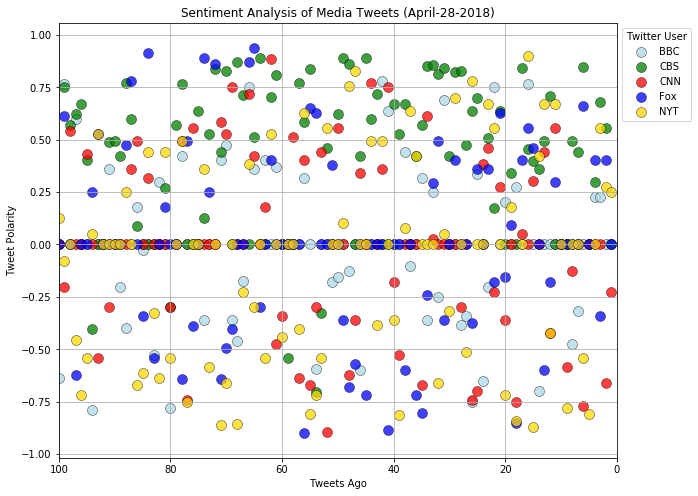

In [4]:
# Use the loc function to isolate each newsroom
bbc_df = sentiment_df.loc[sentiment_df["User"] == "BBC"]
cbs_df = sentiment_df.loc[sentiment_df["User"] == "CBS"]
cnn_df = sentiment_df.loc[sentiment_df["User"] == "CNN"]
fox_df = sentiment_df.loc[sentiment_df["User"] == "Fox News"]
nyt_df = sentiment_df.loc[sentiment_df["User"] == "The New York Times"]

date = datetime.today().strftime("%B-%d-%Y")

# Plot our data
fig = plt.figure(figsize=(10,8))

plt.scatter(bbc_df["Tweet Count"], bbc_df["Compound"], color="lightblue", s = 100, edgecolors="black", linewidths = .5, label = "BBC", alpha=0.75)
plt.scatter(cbs_df["Tweet Count"], cbs_df["Compound"], color="green", s = 100,linewidths = .5, edgecolors="black",label = "CBS", alpha=0.75)
plt.scatter(cnn_df["Tweet Count"], cnn_df["Compound"], color="red", s = 100,linewidths = .5, edgecolors="black",label = "CNN", alpha=0.75)
plt.scatter(fox_df["Tweet Count"], fox_df["Compound"], color="blue", s = 100,linewidths = .5, edgecolors="black",label = "Fox", alpha=0.75)
plt.scatter(nyt_df["Tweet Count"], nyt_df["Compound"], color="gold",s = 100, linewidths = .5, edgecolors="black",label = "NYT", alpha=0.75)

# Give our plot a title, labels, gridlines, and a legend
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f'Sentiment Analysis of Media Tweets ({date})')
lgnd = plt.legend(bbox_to_anchor = (1,1), title = 'Twitter User') 
plt.xlim(100, 0)
plt.grid()
plt.show()

#save our fig as a .png
plt.savefig(f'Sentiment Analysis of Media Tweets ({date}).png')


# Plot Average Newsroom Compound

In [5]:
# Store our sentiment analysis in a dataframe
news_df = pd.DataFrame(average_sentiment_list).set_index("User").round(3)
news_df.head()

Compound  Negative  Neutral  Positive  Tweet Count
User                                                                  
BBC                    0.007     0.053    0.889     0.058          100
CBS                    0.391     0.019    0.803     0.178          100
CNN                    0.009     0.075    0.848     0.077          100
Fox News               0.020     0.068    0.854     0.078          100
The New York Times    -0.050     0.091    0.832     0.076          100

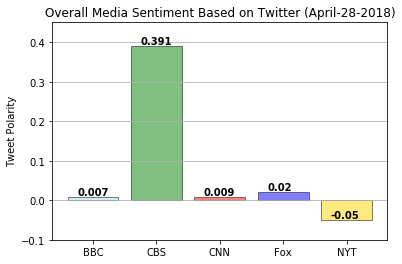

In [6]:
# Declare variables for our plots
station = ['BBC', 'CBS', 'CNN', 'Fox', 'NYT']
colors = ['lightblue', 'green', 'red', 'blue', 'gold']
x_axis = station
y_axis = news_df["Compound"]


# Plot each Newsroom's tweets
plt.bar(x_axis, y_axis, color = colors , alpha=0.5, align="center", edgecolor='black')

# Give our chart some labels and a tile
plt.title(f"Overall Media Sentiment Based on Twitter ({date})")
plt.ylabel("Tweet Polarity")

# give the chart y axis gridlines
plt.gca().yaxis.grid(True)
plt.ylim(-.1, .45)

# Add values to each bar
y = news_df["Compound"]
for i, v in enumerate(y):
    plt.text(i-.25, v+.005, str(v).format(), color='black', fontweight = 'bold')

# Print our chart to the screen
plt.show()

# Save our figure as a .png file
plt.savefig(f"Overall Media Sentiment Based on Twitter ({date}).png")